<center> <h1>DS102 Project Group 5: </h1></center>
<center> <h1>Deriving Market Insights from Private Real Estate Data </h1></center>

<h3>Team Members</h3>
1. Bryan Ang<br>
2. Ezra Lim <br>
3. Rachel Ang <br>
4. Jon Yeo<br>
5. Shashi Sunderrajan<br>

<h2>Table of Contents</h2>

1. [Background](#1)
2. [Project Objectives](#2)
3. [Dataset](#3)
4. [Methodology](#4)
5. [Data Cleaning](#5)
6. [Descriptive Analyatics](#6)
7. [Machine Learning](#7)
8. [Conclusion](#8)

<a id='1'><h2>Background</h2></a>

From en-blocs to increases in the additional buyer's stamp duty, the property market has always been a hot topic in land scarce Singapore. Apart from the necessity of having to live in a property, the local property market has also been the choice investment vehicle for many Singaporeans whether through REITs or the direct purchase of property. Therefore, it is imperative to explore how data can be used to deliver insights and predict the outcome of the market.

<center><img src="https://sg.tepcdn.com/public/usr/1r40hw/b5083a-Source-Savills-Singapore-600px.jpg" width=700/> </center>

<a id='2'><h2>Project Objectives</h2></a>

To derive insights from the private real estate market dataset that can inform investment decisions in the private housing market and create a model that can predict future prices with a reasonable degree of reliability.

This will be accomplished in two ways:
1. Exploratory Data Analysis

2. Machine Learning

<a id='3'><h2>Dataset</h2></a>

<h3><a href='https://www.ura.gov.sg/realEstateIIWeb/transaction/search.action'> URA Private Residential Property Transactions</a></h3>

This dataset comprises of real estate transactions in Singapore for the past 61 months (Mar 16 - Mar 21).

Particular data of interest includes Price, Number of Units, Area, Date of Sale, Floor Level, Property Type, Market Segment and Tenure.

<a id='4'><h2>Methodology</h2></a>

<img src="https://i.imgur.com/pIc9rZc.png">

<a id='5'><h2>Data Cleaning</h2></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h4>1. Merging and Reading Files</h4>

1. Merging and Reading Files
2. Extract columns of interest
3. Remove rows with NaN values and No. of Units > 1
4. Simplifying columns:
    - Type
    - Tenure
5. Integer encode columns:
    - Floor level
    - Date of sale
6. Before and after comparison

<h4>1. Merging and Reading Files</h4>

The below code was used to merge the separate data sets together.

It has been commented out as it merges all datasets within the same file as this notebook together.

In [2]:
# from os import listdir

# filepaths = [f for f in listdir("./") if f.endswith('.csv')]
# df = pd.concat(map(pd.read_csv, filepaths))

# df.to_csv("master.csv")

Reading the compiled dataset into a dataframe.

In [3]:
all_df = pd.read_csv('master.csv')

print(all_df.shape)
all_df.head()

(118594, 17)


,Unnamed: 0,S/N,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale
0,0,1,ONE PEARL BANK,PEARL BANK,Apartment,3.0,RCR,99 yrs lease commencing from 2019,New Sale,1.0,1319000.0,-,527.0,Strata,31 to 35,2501.0,Mar-21
1,1,2,THE REEF AT KING'S DOCK,HARBOURFRONT AVENUE,Condominium,4.0,RCR,99 yrs lease commencing from 2021,New Sale,1.0,1684000.0,-,721.0,Strata,01 to 05,2335.0,Mar-21
2,2,3,NORMANTON PARK,NORMANTON PARK,Apartment,5.0,RCR,99 yrs lease commencing from 2019,New Sale,1.0,935770.0,-,517.0,Strata,11 to 15,1811.0,Mar-21
3,3,4,PARC CLEMATIS,JALAN LEMPENG,Apartment,5.0,OCR,99 yrs lease commencing from 2019,New Sale,1.0,1200000.0,-,689.0,Strata,21 to 25,1742.0,Mar-21
4,4,5,PARC CLEMATIS,JALAN LEMPENG,Apartment,5.0,OCR,99 yrs lease commencing from 2019,New Sale,1.0,1205000.0,-,689.0,Strata,21 to 25,1749.0,Mar-21


<h4>2. Selecting Relevant Columns</h4>

In [4]:
selected_features = ['Type', 'Market Segment','Tenure','Type of Sale','No. of Units', 'Price ($)',"Area (Sqft)","Floor Level","Date of Sale"]
clean_df = all_df[selected_features]

<h4>3. Dropping Rows with Nan values and No. of Units > 1</h4>

In [5]:
clean_df.dropna(inplace = True)

We are also removing rows where the number is greater than 1 as individuals, who we intend this data to be used by, are not likely going to purchase multiple units (especially in the hundreds) of a property project.

In [6]:
clean_df = clean_df[clean_df["No. of Units"] == 1.0]

<h4>4. Simplifying Columns with Discrete Values</h4>

Only necessary for 'Type' and 'Tenure' columns which are complicated.

<h5>Creating a list of lists of unique values in each column to detemine what needs to be simplified and for simplification and encoding later on</h5>

In [7]:
#creating a list of lists to access unqiue values in each column
columnslist = clean_df.columns.tolist()
columnslist

uniquelist = []
for i in columnslist:
    ilist = (clean_df[i].tolist())
    ilist = list(dict.fromkeys(ilist))
    uniquelist.append(ilist)

# uniquelist is examined to detemine what needs to be simplified.

<h5>Simplifying 'Type' Column</h5>

In [8]:
def TypeSimp(x):
    if x in uniquelist[0][0:3]:
        return "Condo/Apartment"
    else:
        return "Landed"

clean_df["Type Simp"] = clean_df["Type"].apply(TypeSimp)

<h5>Encoding 'Tenure' Column</h5>

In [9]:
clean_df['Tenure'] = clean_df['Tenure'].str.split().str[0]

def TenureSimp(x):
    if x == "Freehold" or int(x) >= 110:
        return 'Freehold'
    else:
        return "Leasehold"
    
clean_df["Tenure Simp"] = clean_df["Tenure"].apply(TenureSimp)

<h4>Integer Encoding</h4>

This will be done for 'Floor Level' and 'Date of Sale'

<h5>Encoding 'Floor Level' column</h5>

In [10]:
#sorting list so as to integer encode with the index
uniquelist[-2].sort()
uniquelist[-2].remove("B1 to B5")
uniquelist[-2].insert(0,"B1 to B5")

#integer encoding function
def FL_IE(x):
    return uniquelist[-2].index(x)

clean_df['Encoded Floor Level'] = clean_df['Floor Level'].apply(FL_IE)

<h5>Encoding 'Date of Sale' column</h5>

In [11]:
uniquelist[-1].reverse()

def DoS_IE(x):
    return uniquelist[-1].index(x)

clean_df['Encoded Date of Sale'] = clean_df['Date of Sale'].apply(DoS_IE)

<h4>Before and After Cleaning Comparision</h4>

In [12]:
print(all_df.shape)
display(all_df.head())
print(clean_df.shape)
display(clean_df.head())

(118594, 17)


,Unnamed: 0,S/N,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale
0,0,1,ONE PEARL BANK,PEARL BANK,Apartment,3.0,RCR,99 yrs lease commencing from 2019,New Sale,1.0,1319000.0,-,527.0,Strata,31 to 35,2501.0,Mar-21
1,1,2,THE REEF AT KING'S DOCK,HARBOURFRONT AVENUE,Condominium,4.0,RCR,99 yrs lease commencing from 2021,New Sale,1.0,1684000.0,-,721.0,Strata,01 to 05,2335.0,Mar-21
2,2,3,NORMANTON PARK,NORMANTON PARK,Apartment,5.0,RCR,99 yrs lease commencing from 2019,New Sale,1.0,935770.0,-,517.0,Strata,11 to 15,1811.0,Mar-21
3,3,4,PARC CLEMATIS,JALAN LEMPENG,Apartment,5.0,OCR,99 yrs lease commencing from 2019,New Sale,1.0,1200000.0,-,689.0,Strata,21 to 25,1742.0,Mar-21
4,4,5,PARC CLEMATIS,JALAN LEMPENG,Apartment,5.0,OCR,99 yrs lease commencing from 2019,New Sale,1.0,1205000.0,-,689.0,Strata,21 to 25,1749.0,Mar-21


(118131, 13)


,Type,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Area (Sqft),Floor Level,Date of Sale,Type Simp,Tenure Simp,Encoded Floor Level,Encoded Date of Sale
0,Apartment,RCR,99,New Sale,1.0,1319000.0,527.0,31 to 35,Mar-21,Condo/Apartment,Leasehold,8,60
1,Condominium,RCR,99,New Sale,1.0,1684000.0,721.0,01 to 05,Mar-21,Condo/Apartment,Leasehold,2,60
2,Apartment,RCR,99,New Sale,1.0,935770.0,517.0,11 to 15,Mar-21,Condo/Apartment,Leasehold,4,60
3,Apartment,OCR,99,New Sale,1.0,1200000.0,689.0,21 to 25,Mar-21,Condo/Apartment,Leasehold,6,60
4,Apartment,OCR,99,New Sale,1.0,1205000.0,689.0,21 to 25,Mar-21,Condo/Apartment,Leasehold,6,60


<a id='6'><h2>Descriptive Analytics</h2></a>

1. Overview
    - Overview of Data
    - Outliers
    - Frequency of Prices
    - Correlation of Quantitative Factors
    - Overall Trend of Market
2. Analysis
    - Housing Types
    - Market segments
    - Area and Price
3. Summary of Exploratory Data Analysis

<h3>1. Examining Overall Market</h3>

<h4>1a. Overview of Data</h4>

In [13]:
clean_df.describe()

,No. of Units,Price ($),Area (Sqft),Encoded Floor Level,Encoded Date of Sale
count,118131.0,1.181310e+05,118131.000000,118131.000000,118131.000000
mean,1.0,1.683349e+06,1250.628277,3.218021,29.955846
std,0.0,1.840365e+06,1165.059428,1.698730,17.826708
min,1.0,4.000000e+04,258.000000,0.000000,0.000000
25%,1.0,9.400000e+05,721.000000,2.000000,15.000000
50%,1.0,1.265000e+06,1023.000000,3.000000,27.000000
75%,1.0,1.780000e+06,1346.000000,4.000000,46.000000
max,1.0,1.450000e+08,52059.000000,16.000000,60.000000


<h4>1b. Outliers</h4>

<center><img src="https://cdn.britannica.com/00/147100-050-4CADEAB0/James-Dyson-British-fan.jpg" width=200/> </center>

British billionaire James Dyson, the mogul behind the bagless vacuum cleaner and the Supersonic hairdryer, will soon get to enjoy these remarkable luxuries after he snapped up Singapore’s priciest penthouse for a cool S$73.8 million

In [14]:
# plt.figure(figsize=(10,4))
# sns.boxplot(x='Price ($)', data=clean_df,showfliers=False)

IQR of 840,000,

Upper bound = $3,040,000

Lower bound = -$320,000

<h5>Removing Outliers</h5>

In [15]:
no_out_df = clean_df[clean_df["Price ($)"]<=3040000]

We are removing outliers for the following reasons:
1) It skews the data, obscuring insights that can be otherwise obtained from graphs.

2) It is likely that properties that exceed the upper bound (i.e. outliers), have different factors which impact their price. The nature of the good itself is likely to be different, which is why we have decided to limit the scope of this exploration to properties between the upper and lower bound.

<h4>1c. Frequency of Different Prices in Property Market</h4>

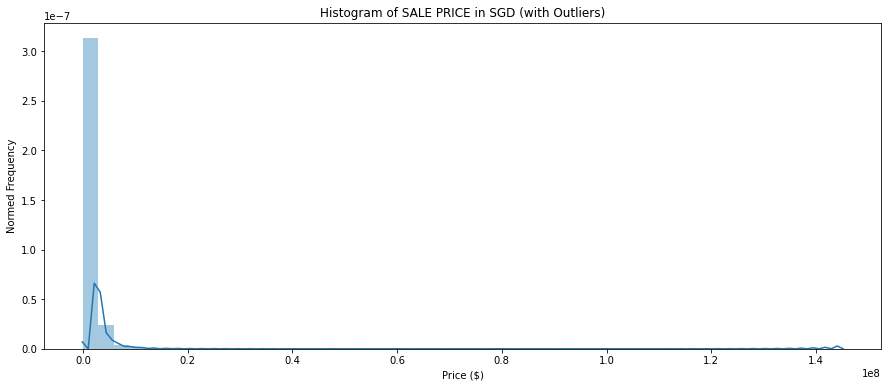

In [16]:
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sales = sns.distplot(clean_df['Price ($)'])
plt.title('Histogram of SALE PRICE in SGD (with Outliers)')
plt.ylabel('Normed Frequency')
# print(sales.skew())
plt.show()

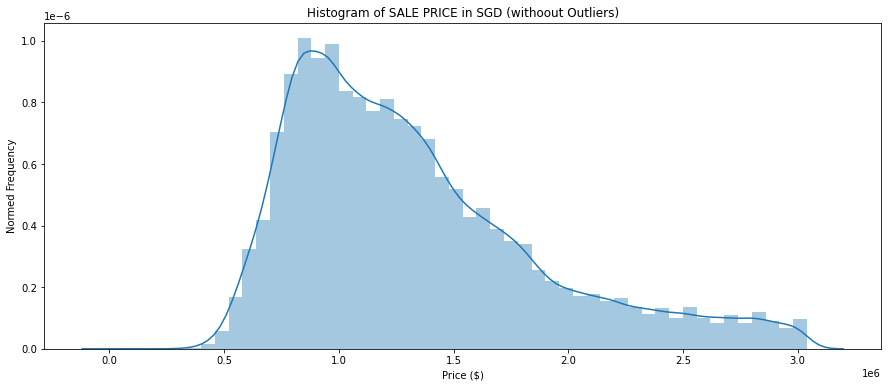

In [17]:
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sales = sns.distplot(no_out_df['Price ($)'])
plt.title('Histogram of SALE PRICE in SGD (withoout Outliers)')
plt.ylabel('Normed Frequency')
# print(sales.skew())
plt.show()

When looking at sale price across the dataset, there is a large range of sale prices from 40,000SGD - 145,000,000SGD which produces a hard to interprete graph.

On the otherhand, removing outliers produces this graph which seems to close on a lognormal distribution. This is likely because prices for properties have a lower bound that is not possible for prices to cross. 

<h4>Correlation Matrix Between Quantitative Factors</h4>

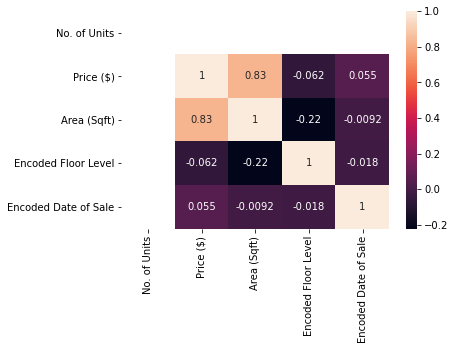

In [18]:
sns.heatmap(clean_df.corr(),annot = True)

From the above, price and area have the strongest correlation which indicates that area is a vital factor for prices.

Interestingly, when outliers are included:

    1. Area and Price have a stronger correlation of 0.83
    2. Floor level and Price have a stronger negative correlation of -0.62
    3. Date of sale and Price has a weaker correlation of 0.055

<h4>Determining the overall trend of market </h4>

Preparing lists to feed into graph.

In [19]:
date_gb = clean_df.groupby("Encoded Date of Sale")
date_gb_sum = date_gb.sum()
display(date_gb.sum())

AvgPriceList = []
for x in range(0,61):
    AvgPriceList.append((date_gb_sum["Price ($)"][x])/(date_gb_sum["No. of Units"][x]))

dateslist = uniquelist[-1]

,No. of Units,Price ($),Area (Sqft),Encoded Floor Level
Encoded Date of Sale,,,,
0,560.0,8.436706e+08,714765.0,1835
1,1913.0,2.622946e+09,2261252.0,6046
2,2151.0,3.280967e+09,2524177.0,7592
3,1504.0,2.419966e+09,1957138.0,4799
4,2674.0,3.581211e+09,3193509.0,8490
...,...,...,...,...
56,2262.0,4.151876e+09,2981076.0,6922
57,2888.0,5.256544e+09,3779314.0,9672
58,3511.0,6.132594e+09,4182124.0,11344


Plotting graph.

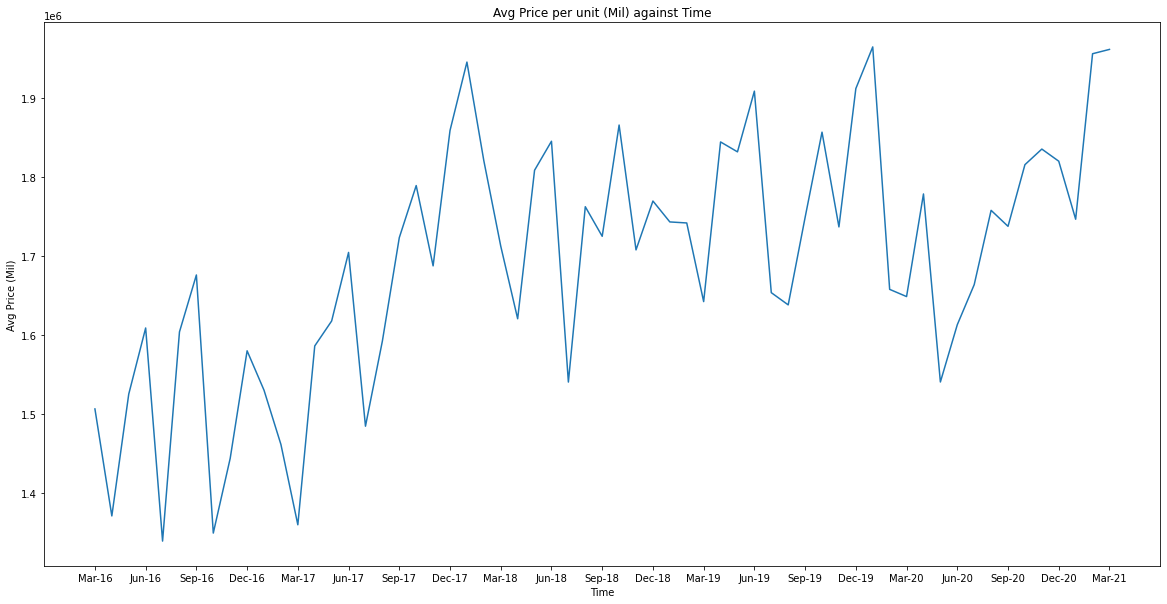

In [20]:
plt.figure(figsize=(20,10))
plt.plot(dateslist, AvgPriceList)
plt.title("Avg Price per unit (Mil) against Time")
plt.ylabel("Avg Price (Mil)")
plt.xlabel("Time")
plt.xticks(np.arange(0, 61, 3))
plt.show()

<center> Fig 1 </center>

We can observe a general uptrend in the graph above, indicating that average prices in the private real estate market are on the rise. Which suggests that there are investment opportunties in the market.

The market seems to be at a peak which stirs concerns about overvaluation. The surge in prices is likley due to low interest rates which makes the cost of borrowing lower, resulting in more affordable mortgages. Potential savings from lower interest rates could justify entering the property market at this juncture, despite higher prices.

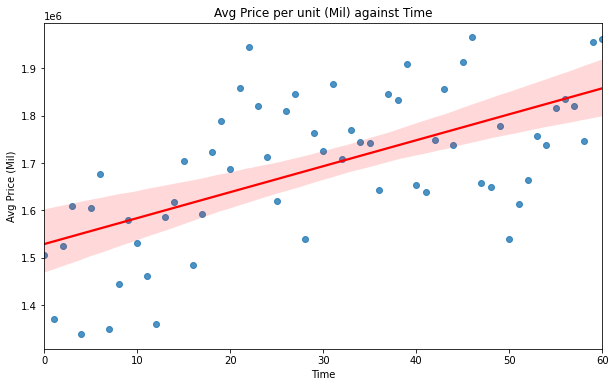

In [21]:
df = pd.DataFrame()
df["Price"] = AvgPriceList
df["Time"] = list(range(0, 61))

plt.figure(figsize=(10,6))
reggraph = sns.regplot(x='Time', y='Price', data=df, fit_reg=True, scatter_kws={'alpha':0.8},line_kws={"color":"red"})

reglist = []
reglist.append(reggraph.get_lines()[0].get_xdata())
reglist.append(reggraph.get_lines()[0].get_ydata())

plt.title("Avg Price per unit (Mil) against Time")
plt.ylabel("Avg Price (Mil)")
plt.xlabel("Time")

plt.show()

<center> Fig 2 </center>

In [22]:
Return = reglist[1][99]-reglist[1][0]
PerReturn = (reglist[1][99]-reglist[1][0])/reglist[1][0]*100
Annualised_Return = ((1+(PerReturn/100))**(1/5)-1)*100

print("Overall Return", Return)
print("Overall Percentage Increase:", PerReturn,'%')
print("Annualised Return:", Annualised_Return,'%')

Overall Return 328531.18119063624
Overall Percentage Increase: 21.48725238795804 %
Annualised Return: 3.9695446677423973 %


From the above graph, we can observe that the average price of properties increased by a total of 21.49% over the period of 5 years.

Annualised, that is a rate of return of 3.97% which heftily beats inflation in Singapore.

This rate would be higher if the property is rented or leased out. The data therefore suggests that the private property market remains a viable vehicle for investing.

<h3>2. Analysis</h3>

<h4>2a. Examining Separate Housing Types </h4>

<h4>Prepare lists to feed into Price-Time graph.</h4>

In [23]:
typedate_gb = clean_df.groupby(["Type Simp","Encoded Date of Sale"])
date_type = typedate_gb.sum()
date_type.reset_index(inplace = True)

CA_avg = []
for x in range(0,61):
    CA_avg.append((date_type["Price ($)"][x])/(date_type["No. of Units"][x]))
    
Landed_avg = []
for x in range(61,122):
    Landed_avg.append((date_type["Price ($)"][x])/(date_type["No. of Units"][x]))

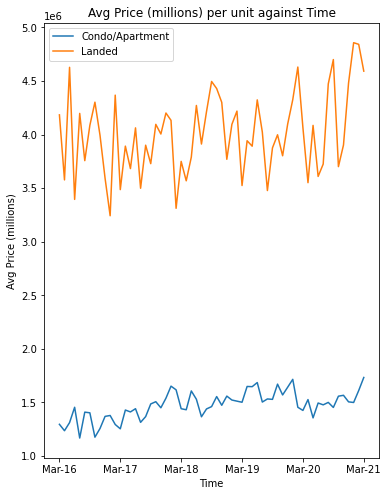

Maximum value of condo/aparment price: 1732373.93
Month of condo/apartment price: Mar-21


In [24]:
fig = plt.figure(figsize=(6,8))
fig.subplots_adjust(hspace=.5)

ax1 = fig.add_subplot(1,1,1)
ax2 = fig.add_subplot(1,1,1)

ax1.plot(dateslist, CA_avg, label = 'Condo/Apartment')
ax2.plot(dateslist, Landed_avg,label = 'Landed')
ax1.set_xticks(np.arange(0, 61, 12))
plt.legend()
plt.title("Avg Price (millions) per unit against Time")
plt.ylabel("Avg Price (millions)")
plt.xlabel("Time")

max(CA_avg)
CA_avg.index(1732373.927562922)
plt.show()
print("Maximum value of condo/aparment price:", max(CA_avg).round(2))
print("Month of condo/apartment price:",dateslist[CA_avg.index(1732373.927562922)])

<center> Fig 3 </center>

From the above graph, the following insights can be derived:

(1) The landed market is more volatile than the Condo/Apartment segment. Investors who are risk adverse should approach the market cautiously.

(2) There is a correlation between housing types and prices, landed houses tend to cost more than condominiums and apartments.

(3) There is a general upwards trend in both sectors. The trend is more prominent in condo/apartment prices.

(4) Condo/Apartment prices were at a 5 year high of SGD 1732373.93 in Mar-21. This is possibly due to the following factors:

    1. Recent new condominium launches in have been pricier.
    2. Pricier new sales have led to an exodus from the new sale to resale market, driving up demand and increasing prices overall. The Straits Times notes that Feb-21 was the 7th straight month where resale prices increased.
    3. A sizeable number of HDB owners will have completed their minimum 5 year HDB occupation period in 2021 and can sell their HDBs and move into Condominiums, further driving prices up.

Therefore, potential buyers of resale condominiums/apartments should be cautious during this period as prices could be inflated.

<h4>Price Distribution Across Property Types</h4>

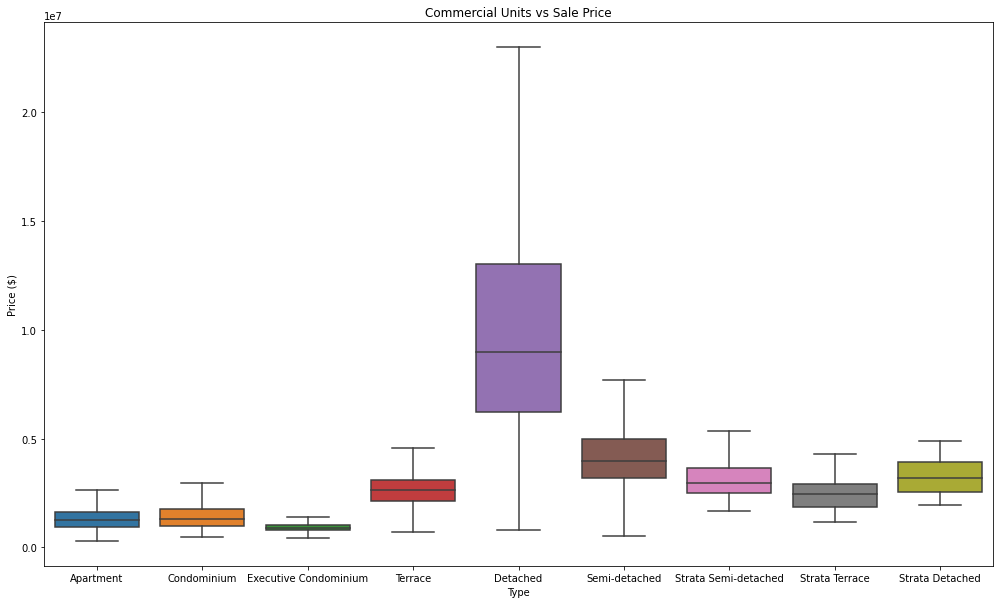

In [25]:
plt.figure(figsize=(17,10))
sns.boxplot(x='Type', y='Price ($)', data=clean_df, showfliers = False)
plt.title('Commercial Units vs Sale Price')
plt.show()

The following insights can be derived from the above graph:

(1) Prices are affected by house type, with the greatest difference being between Detached Type and all other properties.

(2) Landed properties have a higher median than condo/apartment properties.

(3) More expensive condo/apartment properties are comparable to median terrace and strata landed properties. Condo/apartments are more suitable for investors with lower capital.

<h3>2b. Examining Separate Market Segments</h3>

<center><img src="https://www.colliers.com/-/media/images/colliers/asia/singapore/press-release-images/2020-10-23-ura-real-estate-statistics-q3-2020-residential.ashx?la=en-sg&hash=70E40D0590C9B2809BD9C2E95E321A0E" width=700/></center>

<h4>Preparing lists to feed into Price-Time Graph.</h4>

In [26]:
segmentdate_gb = clean_df.groupby(["Market Segment","Encoded Date of Sale"])
date_segment = segmentdate_gb.sum()
date_segment.reset_index(inplace = True)

CCR_avg = []
for x in range(0,61):
    CCR_avg.append((date_segment["Price ($)"][x])/(date_segment["No. of Units"][x]))
    
OCR_avg = []
for x in range(61,122):
    OCR_avg.append((date_segment["Price ($)"][x])/(date_segment["No. of Units"][x]))
    
RCR_avg = []
for x in range(122,183):
    RCR_avg.append((date_segment["Price ($)"][x])/(date_segment["No. of Units"][x]))

<h4>Feeding data into graphs.</h4>

Text(0.5, 1.0, 'Transactions per Market Segment')

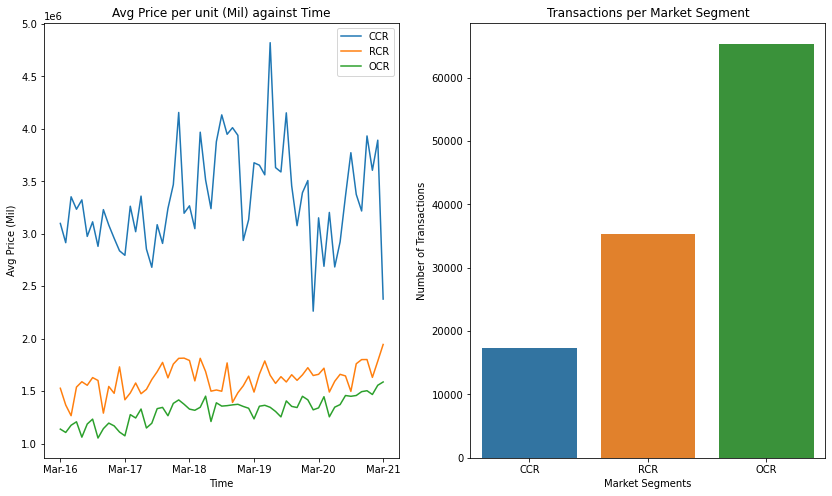

In [27]:
fig = plt.figure(figsize=(14,8))
fig.subplots_adjust(hspace=.5)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,1)
ax3 = fig.add_subplot(1,2,1)
ax4 = fig.add_subplot(1,2,2)

ax1.plot(dateslist, CCR_avg, label = 'CCR')
ax3.plot(dateslist, RCR_avg,label = 'RCR')
ax2.plot(dateslist, OCR_avg,label = 'OCR')

ax1.set_xticks(np.arange(0, 61, 12))



ax1.legend()
ax1.set_title("Avg Price per unit (Mil) against Time")
ax1.set_ylabel("Avg Price (Mil)")
ax1.set_xlabel("Time")


sns.countplot(
    x="Market Segment",
    data = clean_df,
    order = ["CCR", "RCR","OCR"],
    ax = ax4
)

plt.ylabel('Number of Transactions')
plt.xlabel('Market Segments')
plt.title("Transactions per Market Segment")

<center> Fig 4 </center>

From the graphs we can make the following inferences:

(1) There is correlation between market segment and prices - properties within CCR cost more than those in RCR which cost more than those in RCR.

(2) There appears to be no trend for property prices in CCR and a similar upward trend for properties in OCR and RCR.

(3) CCR prices are more volatile compared to RCR and OCR. They also seem to be more susceptible to external shocks as seen by the sharp drop during the Covid-19 period. In fact, CCR price levels have yet to return to pre-Covid levels which indicates that either previous prices were inflated or that properties in the CCR market segment are currently under-valued.

(4)The sharp drop in CCR prices is most likely not a correction which resulted from inflated prices but due to the below phenomenon:

Historically after a financial crisis, housing market bottoms out within 6 months after start of crisis. Following COVID-19 crisis, impact has been minimal (~1.1% dip overall before rising by 2.2% in second quarter). CCR prices were hit the hardest during the latest financial crisis (Mar 2020), average prices approached that of the RCR market segment, which could be due to these factors:

1. People who purchased CCR properties unable to pay off housing loans and forced to sell. If a substantial number of people are forced to do this, supply would increase drastically, reducing prices in the CCR market.

2. CCR properties have a higher probability to be purchased for investments than to live in, and are often first to go when cash flows tighten during a financial crisis

3. While overall prices only dipped by 1.1% in 1Q of crisis, the general stability in RCR and OCR property prices probably cushioned the greater volatility in CCR prices.

CCR houses tend to be leased out, particularly to expatriates. During the pandemic, there was a stark decrease in expats, who have either lost their jobs or want to move back to their home country. House owners who have been paying off their mortgage with rental income will no longer be able to do so, resulting in a large number of properties being sold off at lower prices.




<h3>2c. Examining Relationship Between Area and Price </h3>

All Data

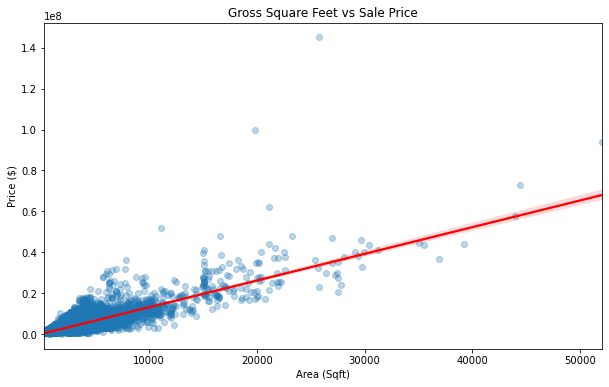

In [28]:
plt.figure(figsize=(10,6))
sns.regplot(x='Area (Sqft)', y='Price ($)', data=clean_df, fit_reg=True, scatter_kws={'alpha':0.3},line_kws={"color":"red"})
plt.title('Gross Square Feet vs Sale Price')
plt.show()

(1) There appears to be correlation between price and area.

(0.0, 4000000.0)

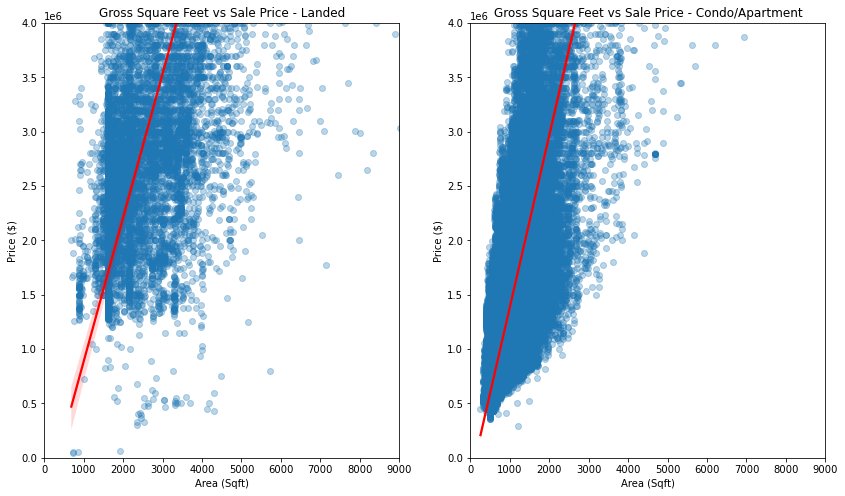

In [29]:
fig = plt.figure(figsize=(14,8))
fig.subplots_adjust(hspace=.5)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x='Area (Sqft)', y='Price ($)', data=clean_df[clean_df["Type Simp"]=="Landed"], fit_reg=True, scatter_kws={'alpha':0.3},ax=ax1,line_kws={"color":"red"})
ax1.set_title("Gross Square Feet vs Sale Price - Landed")
ax1.set_xlim(0,9000)
ax1.set_ylim(0,4000000)

sns.regplot(x='Area (Sqft)', y='Price ($)', data=clean_df[clean_df["Type Simp"]=="Condo/Apartment"], fit_reg=True, scatter_kws={'alpha':0.3},ax=ax2,line_kws={"color":"red"})
ax2.set_title("Gross Square Feet vs Sale Price - Condo/Apartment")
ax2.set_xlim(0,9000)
ax2.set_ylim(0,4000000)
# plt.show()

Price is more strongly affected by area in the Condo/Apartment sub-sector of the housing market.

The summary of our exploratory data analysis will be discussed in the conclusion.

<a id='7'><h2>Machine Learning</h2></a>

Aim: To use qualitative data to predict future prices

1. Single-Variate Linear Regression

2. Multi-Variate Linear Regression

3. Feature Importance

### Pre-processing Data

### Single-Variate Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 

In [31]:
features = clean_df[['Area (Sqft)']]
target = clean_df["Price ($)"]

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 3)

In [32]:
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(lr.score(x_test, y_test))
print(mean_squared_error(y_test, y_pred) ** 0.5)

0.7262792893635883
913869.3145931256


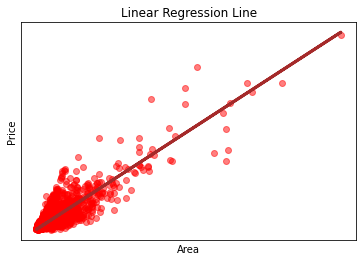

In [33]:
plt.scatter(x_test, y_test,  color='red', alpha = 0.5 )
plt.plot(x_test, y_pred, color='brown', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.title("Linear Regression Line")
plt.ylabel('Price')
plt.xlabel('Area')
plt.show()

Similar to the previous linear regression model, the graph shows a clustering of values near the low price and low area range. This limits the precision of the model at lower price points and areas.

### Multi-Variate Linear regression

In [34]:
clean_df.columns

Index(['Type', 'Market Segment', 'Tenure', 'Type of Sale', 'No. of Units',
       'Price ($)', 'Area (Sqft)', 'Floor Level', 'Date of Sale', 'Type Simp',
       'Tenure Simp', 'Encoded Floor Level', 'Encoded Date of Sale'],
      dtype='object')

In [35]:
features = clean_df[['Area (Sqft)','Encoded Floor Level','Encoded Date of Sale']]
target = clean_df["Price ($)"]

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 3)

In [36]:
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(lr.score(x_test, y_test))
print(mean_squared_error(y_test, y_pred) ** 0.5)

0.743546005487798
884575.6895368577


The R2 score is 0.74. This indicates that the model relatively accurate at predicting the prices of private real estate properties based on Type, Market Segment, Tenure, Floor Level.

From the mean squared error, we can tell that the model is likely to be less precise at lower prices and more precise at higher prices. This is as prices increase, the mean square error is a lower proportion of the price itself.

### Feature Importance 

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 64.37596
Feature: 4, Score: -0.00000
Feature: 5, Score: 98.42458
Feature: 6, Score: 0.00000
Feature: 7, Score: 40.08833
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 36.37576
Feature: 11, Score: -0.00000
Feature: 12, Score: 59.28501
Feature: 13, Score: 0.00000


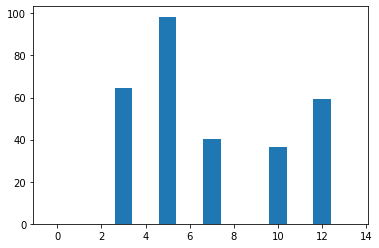

,Type,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Area (Sqft),Floor Level,Date of Sale,Type Simp,Tenure Simp,Encoded Floor Level,Encoded Date of Sale
106227,Executive Condominium,OCR,99,New Sale,1.0,848800.0,1119.0,01 to 05,Oct-17,Condo/Apartment,Leasehold,2,19


In [37]:

# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X = features
y= target
X, y = make_regression(n_samples=1000, n_features=14, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
clean_df.sample()

From the feature importance, we can tell that the most important factor that determines the price of a property is the Area followed by Type of Sale and the Date of Sale.

(1) Area - Larger properties have higher prices.

(2) Type of Sale - New Sales have higher prices than Resales.

(3) Date of Sale - As time goes on, property prices tend to increase.

## Conclusion

<h3>EDA</h3>

Our EDA reveals insights about the current state of the real estate market based on the historic and current data.

<h4>Overall Market</h4>

Overall, the housing market seems to be a reasonable investment. Annualised returns of 3.97% are commendable even before taking into account rental/leasing income (Fig 2).

Furthermore, with current low interest rates, it may be the best time for some to either increase their property portfolio or enter the private property market.

However, given the recent uptick in sale prices, stakeholders should be wary of potentially over-valued properties as the market potentially overheated(Fig 1). Also, while potential rental income has not been considered, maintenance, home upkeep and repairs costs have also not been factored in. This warrants even more reason to be cautious and conduct due diligence before making any investment decision.

<h4>Analysis</h4>
<h5>Housing Types</h5>

The average prices of landed properties seems to have plateaued over the past year. However, high voltality in housing prices indicate that there are opportunies to potentiall turn a substantial profit for investors who are willing to stomach greater risks (Fig 3).

Comparatively, prices for Condominiums and Apartments seem to be on the up and up (Fig 3). This could therefore potentially be an optimal point for condo and apartment owners whose properties have been affected by recent developments to consider cashing in on their real estate investment.

<h5>Market Segment</h5>

With regards to different market segments, investors averse to risk and volatility should steer clear of the CCR market segment (Fig 4).

The OCR market segment appears to provide the most stability, furthermore it's upwards trend is much more prominent as compared to the CCR market segment. Properties in the OCR market segment merit a closer examination when considering where to invest in the market. (Fig 4)

<h3>Machine Learning</h3>
We have created 2 machine learning models, a single variate-model and a multi-variate model.

The latter could potentially be deployed by stakeholders for a swift estimate of future real estate value based on area.


The former, is provides comprehensive and accurate prediction by relying on additional variables (floor level, date of sale)

### Appendix

#### Gausian Mixture Model

In [38]:
clean_df_cluster = clean_df[['Area (Sqft)', 'Price ($)']]

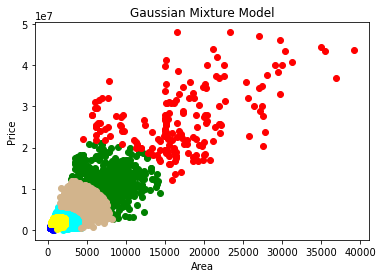

In [39]:
data = clean_df_cluster

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=7, random_state=3)
gmm.fit(data)

#predictions from gmm
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['Price', 'Area', 'cluster']

color=['blue','green','cyan', 'tan', 'red', 'yellow', 'olive']
for k in range(0,6):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Price"],data["Area"],c=color[k])
plt.title("Gaussian Mixture Model")    
plt.xlabel('Area')
plt.ylabel("Price")
plt.show()

Each coloured segment consists of the same number of data points. 

#### K Clustering

##### Plotting the Elbow curve

Text(0.5, 1.0, 'Elbow curve')

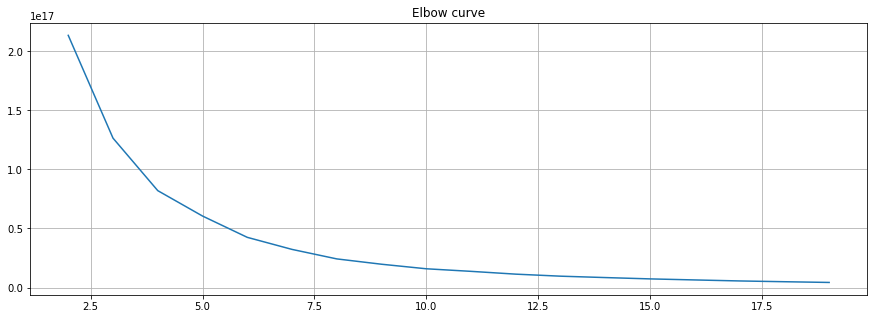

In [40]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = clean_df_cluster
distortions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distortions)
plt.grid(True)
plt.title('Elbow curve')

In [41]:
clean_df_cluster

,Price,Area,cluster
0,527.0,1319000.0,0
1,721.0,1684000.0,5
2,517.0,935770.0,0
3,689.0,1200000.0,0
4,689.0,1205000.0,0
...,...,...,...
118572,3531.0,1840000.0,2
118573,2885.0,1400000.0,2
118574,2745.0,1258000.0,2
118575,2766.0,1290000.0,2


In [42]:
k = 6
model = KMeans(n_clusters=k,  # < Initialise Number Of Clusters here
               random_state=0)

clean_kmeans = model.fit(clean_df_cluster[['Price','Area']]) # < DataFrame of All Variables
print(clean_kmeans)

KMeans(n_clusters=6, random_state=0)


##### Getting Labels of Properties

In [43]:
print('Each property\'s clusters:', clean_kmeans.labels_)
clean_df['label'] = clean_kmeans.labels_
clean_df.head()

Each property's clusters: [0 0 0 ... 0 0 0]


,Type,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Area (Sqft),Floor Level,Date of Sale,Type Simp,Tenure Simp,Encoded Floor Level,Encoded Date of Sale,label
0,Apartment,RCR,99,New Sale,1.0,1319000.0,527.0,31 to 35,Mar-21,Condo/Apartment,Leasehold,8,60,0
1,Condominium,RCR,99,New Sale,1.0,1684000.0,721.0,01 to 05,Mar-21,Condo/Apartment,Leasehold,2,60,0
2,Apartment,RCR,99,New Sale,1.0,935770.0,517.0,11 to 15,Mar-21,Condo/Apartment,Leasehold,4,60,0
3,Apartment,OCR,99,New Sale,1.0,1200000.0,689.0,21 to 25,Mar-21,Condo/Apartment,Leasehold,6,60,0
4,Apartment,OCR,99,New Sale,1.0,1205000.0,689.0,21 to 25,Mar-21,Condo/Apartment,Leasehold,6,60,0


##### Visualing the Clusters

In [44]:
print(clean_kmeans.cluster_centers_, end="\n")

centroids_df = pd.DataFrame(clean_kmeans.cluster_centers_, 
                            columns=['Area (Sqft)','Price ($)'])

centroids_df['label'] = centroids_df.index

centroids_df

[[9.38081754e+02 1.13952871e+06]
 [1.75601985e+04 3.04449121e+07]
 [3.28075972e+03 5.55464142e+06]
 [1.83521796e+03 2.58767670e+06]
 [6.70632733e+03 1.21017664e+07]
 [3.55087500e+04 1.02975000e+08]]


,Area (Sqft),Price ($),label
0,938.081754,1.139529e+06,0
1,17560.198529,3.044491e+07,1
2,3280.759723,5.554641e+06,2
3,1835.217955,2.587677e+06,3
4,6706.327334,1.210177e+07,4
5,35508.750000,1.029750e+08,5


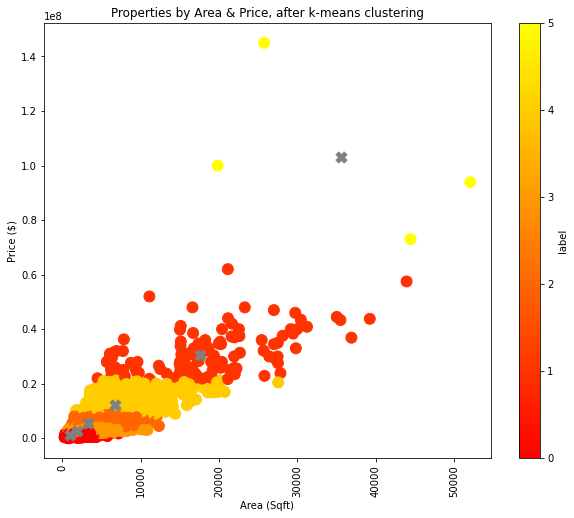

In [45]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111)

clean_df.plot(kind='scatter', x='Area (Sqft)', 
               y='Price ($)', c='label', colormap='autumn', ax=ax1
              ,marker="o", s=120)

centroids_df.plot(kind='scatter', x='Area (Sqft)', 
               y='Price ($)', color='gray', ax=ax1,
                marker="X", s=120,)

ax1.set_title("Properties by Area & Price, after k-means clustering")
plt.xticks(rotation=90)
plt.show()

#### Word CLoud

In [46]:
conda install -c conda-forge wordcloud

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


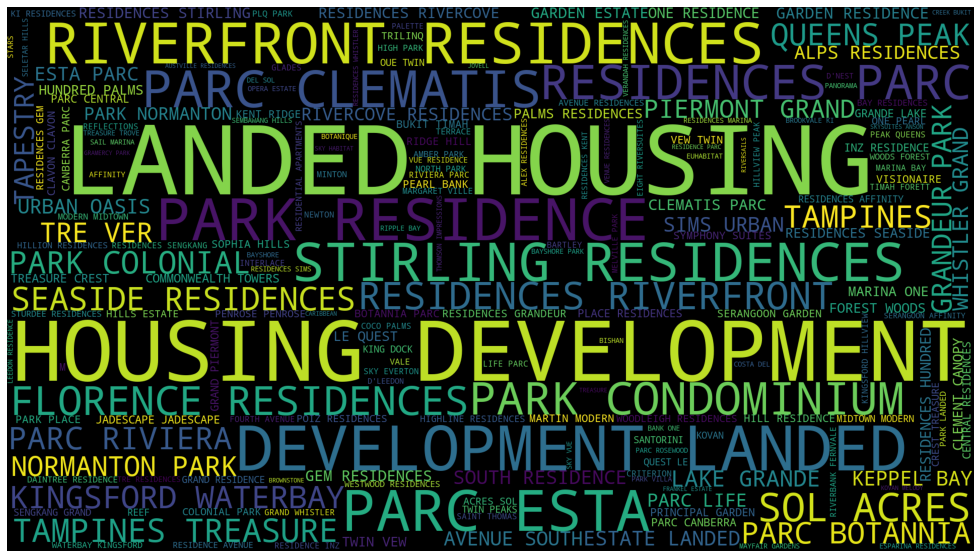

In [47]:
all_df['StreetName'] = all_df['Street Name']
all_df['Projectname'] = all_df['Project Name']


from wordcloud import WordCloud
text = " ".join(name for name in all_df.Projectname.astype(str))
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

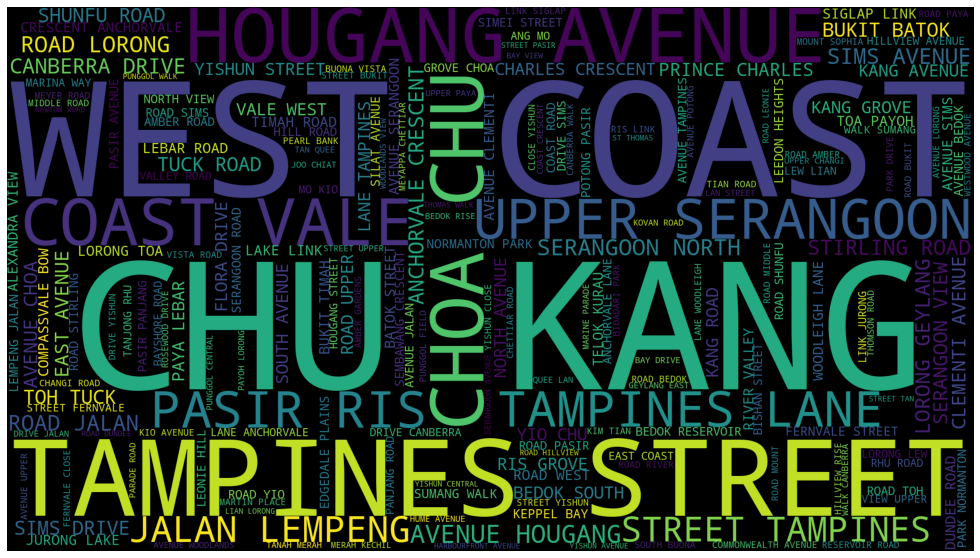

In [48]:
from wordcloud import WordCloud
text = " ".join(name for name in all_df.StreetName.astype(str))
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

### References

https://machinelearningmastery.com/calculate-feature-importance-with-python/

https://www.kaggle.com/

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


https://www.straitstimes.com/business/property/condo-resale-prices-rise-for-7th-month-in-february-sales-increase-despite-cny

https://www.businesstimes.com.sg/real-estate/pricier-new-condo-launches-drove-resale-market-in-january-analysts